In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
plt.style.use('dark_background')

In [2]:
!pip install pykan

In [4]:
from kan import KAN
import pandas as pd
df = pd.read_csv('/content/AIDS_Classification.csv')


In [5]:
df.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,...,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,...,1,3,0,0,0,244,225,708,699,1
7,957,0,41,66.2256,0,1,1,100,0,1,...,1,3,0,0,0,401,366,889,720,0
8,198,3,40,82.5552,0,1,0,90,0,1,...,1,3,1,1,1,214,107,652,131,1
9,188,0,35,78.0192,0,1,0,100,0,1,...,1,3,0,0,1,221,132,221,759,1


In [50]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [6]:
df.shape

(2139, 23)

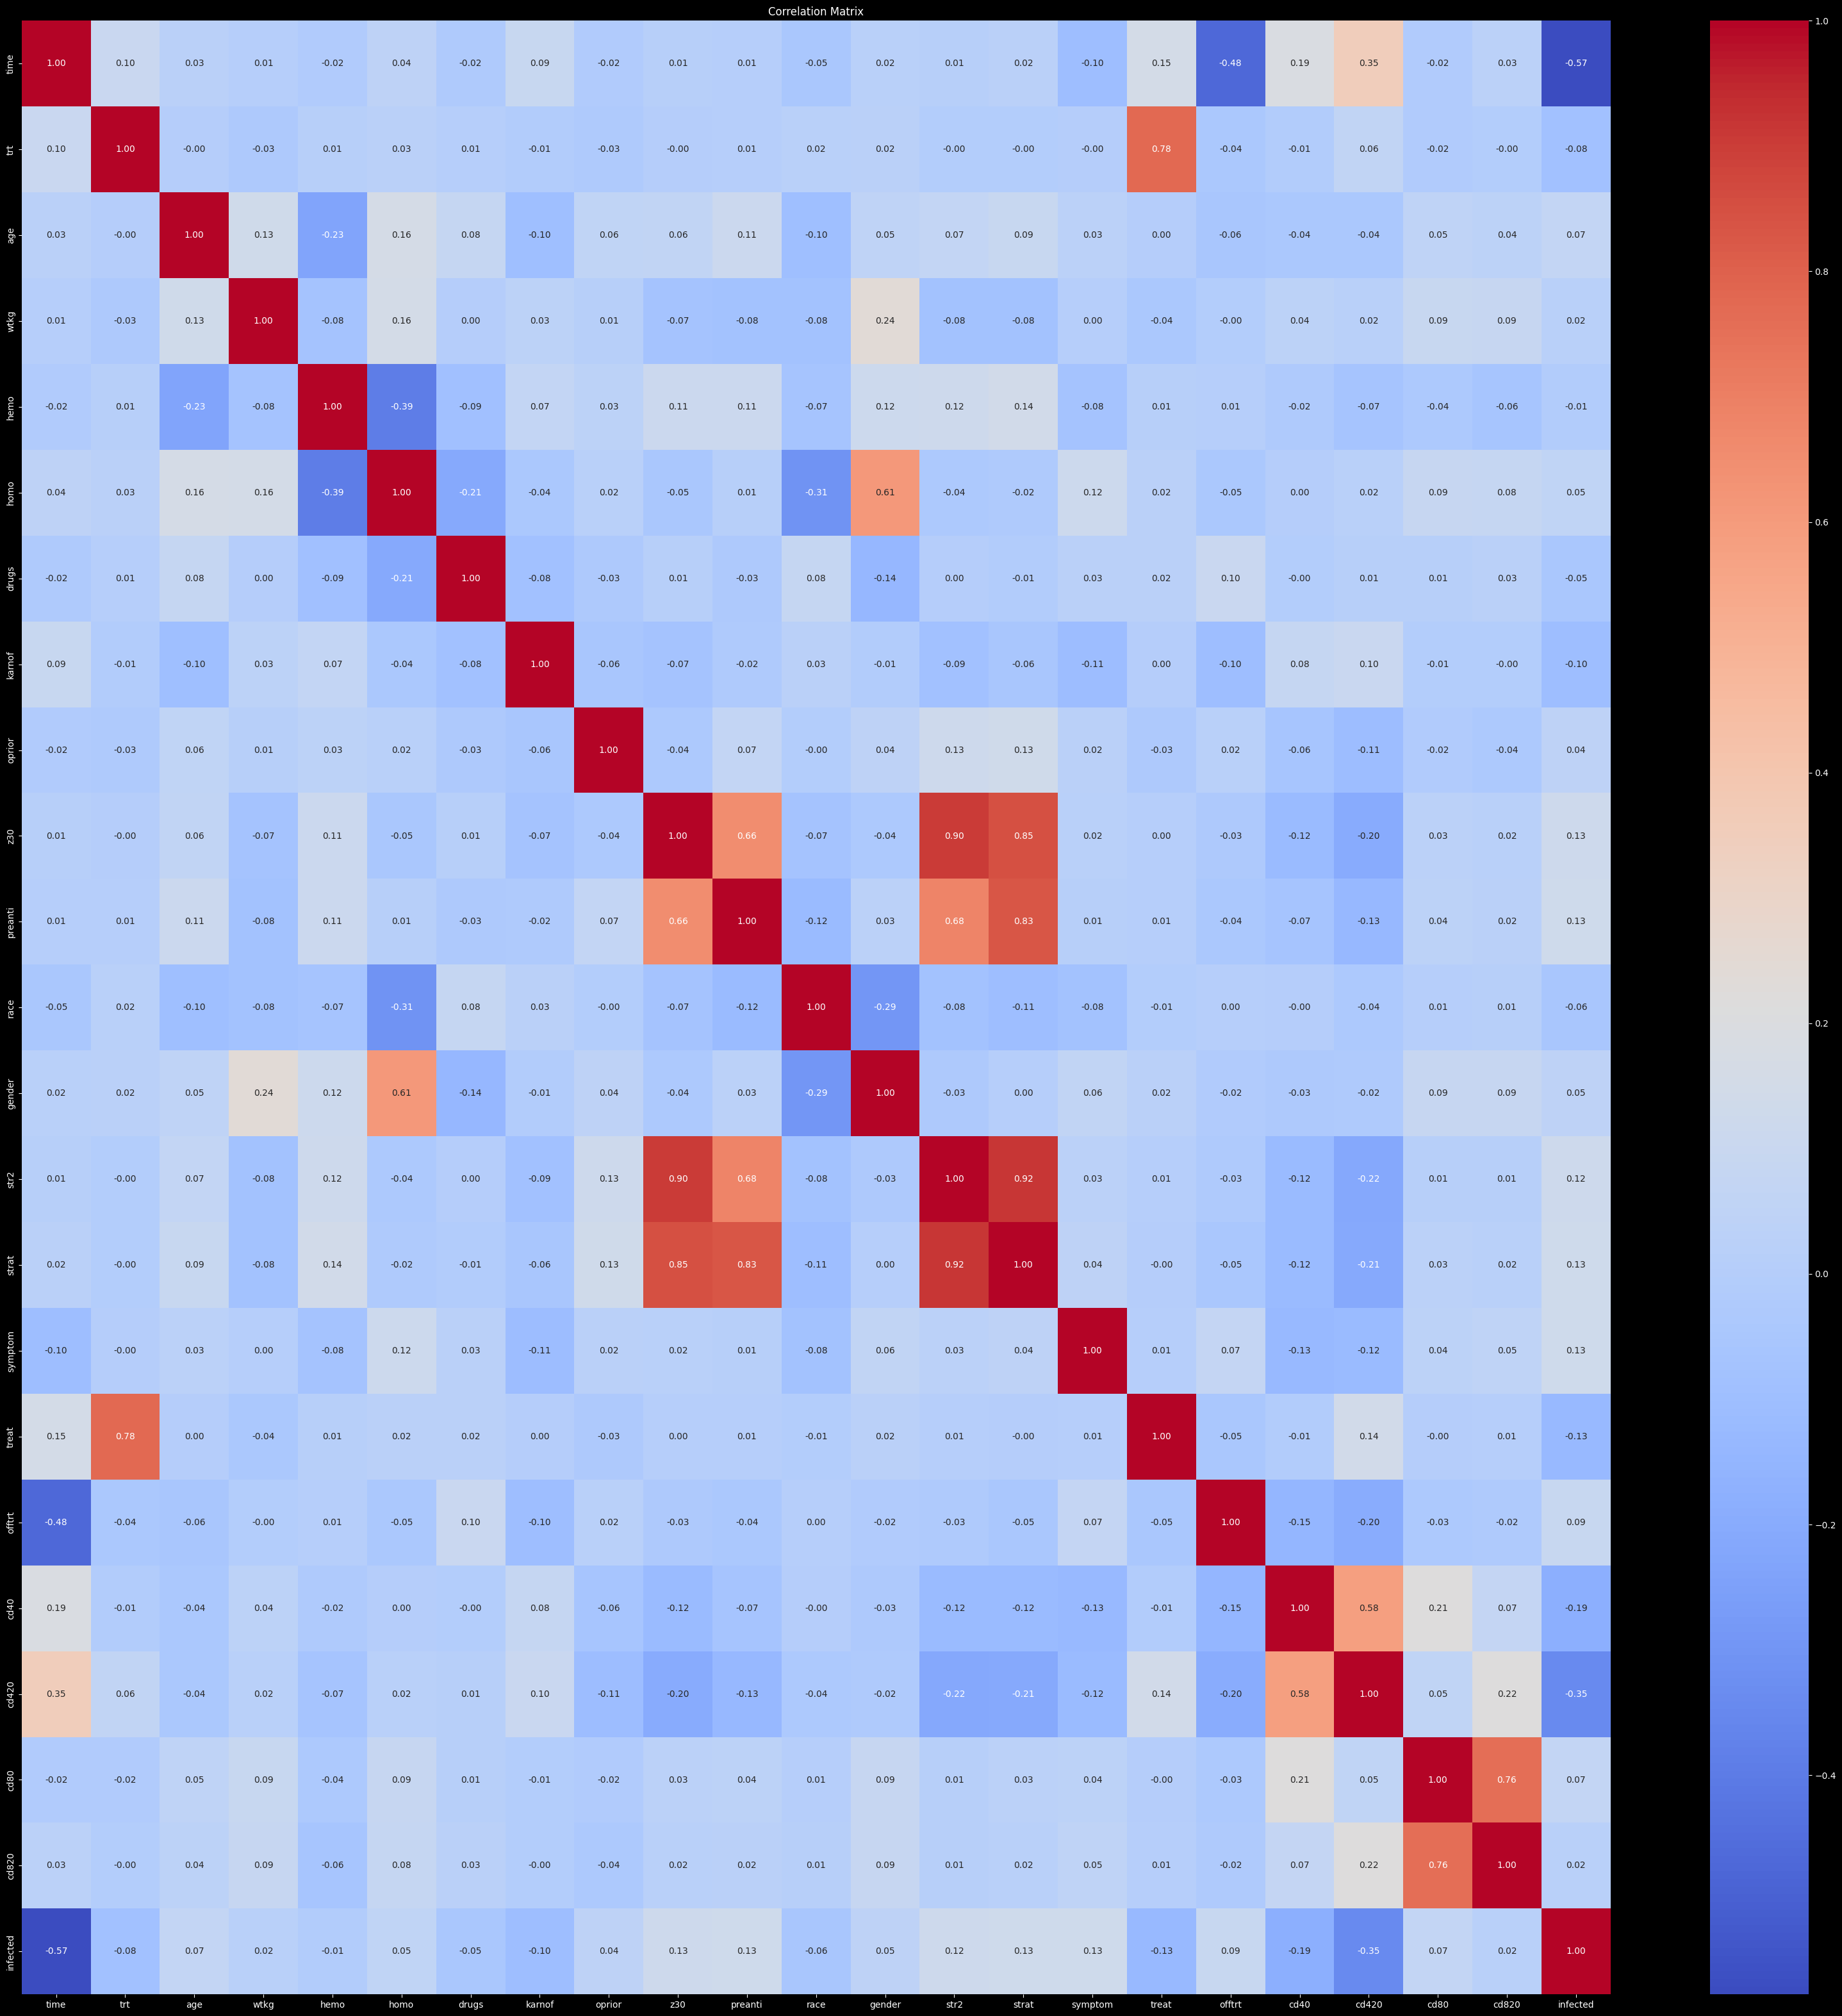

In [53]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:, -1], random_state=3, train_size=.7)

x_train.shape, y_train.shape, x_test.shape, y_test.shape
smote = SMOTE(random_state = 14)

x_train, y_train = smote.fit_resample(x_train, y_train)

x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [18]:
x_train.shape

(2246, 22)

In [16]:
dataset = {}
import torch
dataset['train_input'] = torch.from_numpy(x_train)
dataset['test_input'] = torch.from_numpy(x_test)
dataset['train_label'] = torch.from_numpy(np.array(y_train))
dataset['test_label'] = torch.from_numpy(np.array(y_test))


In [29]:
import torch
model = KAN(width=[22,2], grid=10, k=5)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());

train loss: 4.08e-01 | test loss: 5.40e-01 | reg: 4.77e+01 : 100%|██| 20/20 [01:12<00:00,  3.65s/it]


In [48]:
y_pred = np.argmax(model.forward(dataset['test_input']).detach().numpy(),axis = 1)
y_true = dataset['test_label'].detach().numpy()
from sklearn.metrics import classification_report, confusion_matrix
print("=========classification report========")
print(classification_report(y_true,y_pred))

=========classification report========
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       495
           1       0.70      0.73      0.71       147

    accuracy                           0.87       642
   macro avg       0.81      0.82      0.81       642
weighted avg       0.87      0.87      0.87       642



In [49]:
print("=========confusion matrix========")
print(confusion_matrix(y_true,y_pred))

=========confusion matrix========
[[449  46]
 [ 40 107]]


In [35]:
model.save_ckpt("aids_pred.pt")

save this model to ./model_ckpt/aids_pred.pt
